## Занятие 6
## Математический анализ
## Дифференцирование

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, latex, S, simplify, fraction, Symbol, E
from sympy import sin as Sin
from sympy.calculus.util import continuous_domain
%matplotlib inline

## Лабораторная работа 6
## Математический анализ
## Задание 1
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y = x^2e^{-x}
$$

In [ ]:
def parity(f, x):
  if f(-x) == f(x):
    print('Четная функция')
  elif f(-x) == -f(x):
    print('Нечетная функция')
  else:
    print('Функция общего вида')

def d(f, x, num = 1):
 return simplify(f(x).diff(x, num))

In [ ]:
x = Symbol('x')
def f(x):
  return x ** 2 * E ** (-x)
D = continuous_domain(f(x), x, S.Reals)
display('Область определения: ', D)
parity(f, x)
print('Данная функция не периодическая')

roots = list(solveset(f(x), domain=S.Reals))
print('Пересечения с осями в точках', roots)


df = d(f, x)
display('Производная', df)
df_D = continuous_domain(df, x, S.Reals) # Это область определения производной.
display('Область определения производной', df_D)

df_roots = list(solveset(df, domain=df_D))
print('Нули производной', df_roots)

'Область определения: '

Reals

Функция общего вида
Данная функция не периодическая
Пересечения с осями в точках [0]


'Производная'

x*(2 - x)*exp(-x)

'Область определения производной'

Reals

Нули производной [0, 2]


In [ ]:
points = [df_roots[0] - 1]
points.extend([(df_roots[i] + df_roots[i + 1]) / 2 for i in range(len(df_roots) - 1)])
points.append(df_roots[-1] + 1)

max_points = []
min_points = []
for i, item in enumerate(df_roots):
  df_left = df.subs(x, points[i])
  df_right = df.subs(x, points[i + 1])
  if df_left < 0 and df_right > 0:
    min_points.append(item)
  elif df_left > 0 and df_right < 0:
    max_points.append(item)
display('Точки максимума', max_points, 'Точки минимума', min_points)

'Точки максимума'

[2]

'Точки минимума'

[0]

In [ ]:
df2 = d(f, x, 2)
df2_roots = solve(df2, x)
df2_roots.sort()

points2 = [df2_roots[0] - 1]
points2.extend([(df2_roots[i] + df2_roots[i + 1]) / 2 for i in range(len(df2_roots) - 1)])
points2.append(df2_roots[-1] + 1)
inflection_arr = [item for i, item in enumerate(df2_roots) if df2.subs(x, points2[i]) * df2.subs(x, points2[i + 1]) < 0]
display('Точки перегиба', inflection_arr)

'Точки перегиба'

[2 - sqrt(2), sqrt(2) + 2]

In [ ]:
print('Функция непрерывна на всей числовой оси, а значит вертикальные ассимптоты отсутствуют')

kpos = sympy.limit(f(x)/x, x, +sympy.oo)
kneg = sympy.limit(f(x)/x, x, -sympy.oo)
if kpos == kneg:
  k = kpos
else:
  k = (kneg, kpos)
display('Пределы не равны, наклонной асимптоты нет', k)

y0pos = f(x).limit(x, +sympy.oo)
y0neg = f(x).limit(x, -sympy.oo)
display(y0pos, y0neg)
print('Предел на +oo равен 0, значит есть горизонтальная асимптота')

Функция непрерывна на всей числовой оси, а значит вертикальные ассимптоты отсутствуют


'Пределы не равны, наклонной асимптоты нет'

(-oo, 0)

0

oo

Предел на +oo равен 0, значит есть горизонтальная асимптота


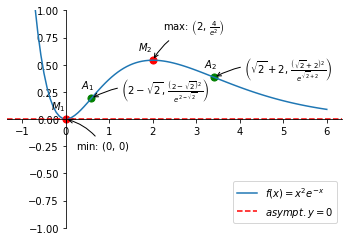

In [ ]:
X = np.linspace(-1, 6, 100)
ax = plt.gca()
ax.plot(X, f(X), label = r'$f(x)=' + sympy.latex(f(x)) + r'$')
ax.set_ylim(-1, 1)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

# подпишем точки экстремума

for x0 in max_points:
  f0 = f(x0)
  ax.scatter([x0],[f0], 50, color='red')
  ax.annotate(r'max: $\left(' + latex(x0) + ',\,' + latex(f0) + r'\right)$', xy=(x0, f0), xycoords='data',
              xytext = (10, 30), textcoords='offset points', fontsize=10,
              arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
  ax.annotate(r'$M_2' + r'$', xy=(x0, f0), xycoords='data',
              xytext=(-15, 10), textcoords='offset points', fontsize=10)

for x0 in min_points:
  f0 = f(x0)
  ax.scatter([x0],[f0], 50, color='red')
  ax.annotate(r'min: $\left(' + latex(x0) + ',\,' + latex(f0) + r'\right)$', xy=(x0, f0), xycoords='data',
              xytext = (10, -30), textcoords='offset points', fontsize=10,
              arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
  ax.annotate(r'$M_1' + r'$', xy=(x0, f0), xycoords='data',
              xytext=(-15, 10), textcoords='offset points', fontsize=10)

# подпишем точки перегиба

for i, x0 in enumerate(inflection_arr):
  f0 = f(x0)
  ax.scatter([x0], [f0], 50, color='green')
  ax.annotate(r'$\left('+latex(x0)+',\,'+latex(f0)+r'\right)$', xy=(x0, f0), xycoords='data',
              xytext=(30, 5), textcoords='offset points', fontsize=10,
              arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
  ax.annotate(r'$A_' + str(i + 1) + r'$', xy=(x0, f0), xycoords='data',
              xytext=(-10, 10), textcoords='offset points', fontsize=10)

# горизонтальная асимптота
ax.axhline(y = 0, color='red', linestyle='--', label=r'$asympt. y=' + sympy.latex(0) + r'$')
ax.legend(loc='lower right')

## Задание 2
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y=xe^{2/x} + 1 
$$

In [ ]:
x = Symbol('x')
def f(x):
  return x * E ** (2 / x) + 1
D = continuous_domain(f(x), x, S.Reals)
display('Область определения: ', D)
parity(f, x)
print('Данная функция не периодическая')


roots = nsolve(f(x), x, -2.5)
print('Пересечения с осями в точках', roots)

df = d(f, x)
display('Производная', df)
df_D = continuous_domain(df, x, S.Reals) # Это область определения производной.
display('Область определения производной', df_D)

df_roots = nsolve(df, 2)
display('Нули производной', df_roots)

'Область определения: '

Union(Interval.open(-oo, 0), Interval.open(0, oo))

Функция общего вида
Данная функция не периодическая
Пересечения с осями в точках -2.34575075492277


'Производная'

(x - 2)*exp(2/x)/x

'Область определения производной'

Union(Interval.open(-oo, 0), Interval.open(0, oo))

'Нули производной'

2.00000000000000

In [ ]:
print('Производная слева от нуля и справа от нуля')
display(df.subs(x, df_roots - 1), df.subs(x, df_roots + 1))
print('Т.к. слева отрицательное значение, а справа положительное, то это точка минимума')
display('Точка минимума', df_roots)

Производная слева от нуля и справа от нуля


-7.38905609893065

0.649244680351559

Т.к. слева отрицательное значение, а справа положительное, то это точка минимума


'Точка минимума'

2.00000000000000

In [ ]:
df2 = d(f, x, 2)
df2_roots = solve(df2, x)
df2_roots.sort()
display('Нули второй производной', df2_roots)
print('Т.к. нулей второй производной нет, то точек перегиба тоже нет')

'Нули второй производной'

[]

Т.к. нулей второй производной нет, то точек перегиба тоже нет


In [ ]:
y0pos = f(x).limit(x, +sympy.oo)
y0neg = f(x).limit(x, -sympy.oo)
display(y0pos, y0neg)
print('Пределы бесконечны, горизонтальных асимптот нет')

lim_left = f(x).limit(x, 0, dir='-')
lim_right = f(x).limit(x, 0)
display(lim_left, lim_right)
print('x0 = 0 - точка разрыва 2го рода и является вертикальной асимптотой')

kpos = sympy.limit(f(x)/x, x, +sympy.oo)
kneg = sympy.limit(f(x)/x, x, -sympy.oo)
if kpos == kneg:
  k = kpos
else:
  k = (kneg, kpos)
b = sympy.limit(f(x) - k*x, x, sympy.oo)
y_as = k * x +b
display('Наклонная асимптота - ', y_as)

def y_as(x):
  return x + 3

oo

-oo

Пределы бесконечны, горизонтальных асимптот нет


1

oo

x0 = 0 - точка разрыва 2го рода и является вертикальной асимптотой


'Наклонная асимптота - '

x + 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


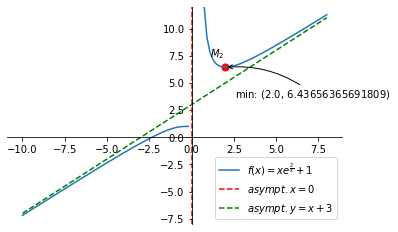

In [ ]:
X = np.linspace(-10, 8, 100)
ax = plt.gca()
ax.plot(X, f(X), label = r'$f(x)=' + sympy.latex(f(x)) + r'$')
ax.set_ylim(-8, 12)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))


# подпишем точки экстремума
x0 = df_roots
f0 = f(x0)
ax.scatter([x0],[f0], 50, color='red')
ax.annotate(r'min: $\left(' + latex(x0) + ',\,' + latex(f0) + r'\right)$', xy=(x0, f0), xycoords='data',
              xytext = (10, -30), textcoords='offset points', fontsize=10,
              arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
ax.annotate(r'$M_2' + r'$', xy=(x0, f0), xycoords='data',
              xytext=(-15, 10), textcoords='offset points', fontsize=10)

# вертикальная асимптота
ax.axvline(x = 0, color='red', linestyle='--', label=r'$asympt. x =' + sympy.latex(0) + r'$')
# наклонная асимптота
ax.plot(X, y_as(X), 'g--', label=r'$asympt. y=' + sympy.latex(x + 3) + r'$')# График наклонной асимптоты
ax.legend(loc='lower right')

Хорасанджян Левон, вариант №157